In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(42)
# cumsum = 누적합
cc = np.cumsum(np.random.randint(10, 150, size = 50))
ton = np.cumsum(np.random.randint(10, 200, size = 50))
mph = np.cumsum(np.random.randint(10, 50, size = 50))

In [7]:
epsilon = np.random.normal(0, 150, size = 50)
W = [0.0013, 0.004, 0.002]
b = 10.0

In [8]:
X = [cc, ton, mph]
l = W[0]*cc + W[1]*ton + W[2]*mph + b + epsilon

In [9]:
class MR_model:
    def __init__(self, learning_rate=1e-20, n_iterations=30000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        np.random.seed(42)
        self.w1 = np.random.uniform(-0.1, 0.1)
        self.w2 = np.random.uniform(-0.1, 0.1)
        self.w3 = np.random.uniform(-0.1, 0.1)
        self.bias = np.random.uniform(-0.1, 0.1)
    
    ## MSE Loss 계산    
    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
       
    def predict(self, X):
        return X[:,0] * self.w1 + X[:,1] * self.w2 + X[:,2] * self.w3 + self.bias
    
    def fit(self, X, y):
        n = len(X)      # 데이터 샘플 수
        
        # 학습 수 만큼 반복
        for i in range(self.n_iterations):
            y_pred = self.predict(X)
            
            current_loss = self.compute_loss(y, y_pred)
            
            error = y_pred - y
            dw1 = (2/n) * np.sum(X[:, 0] * error)
            dw2 = (2/n) * np.sum(X[:,1] * error)
            dw3 = (2/n) * np.sum(X[:,2] * error)
            db = (2/n) * np.sum(error)
            
            self.w1 = self.w1 - self.learning_rate * dw1
            self.w2 = self.w2 - self.learning_rate * dw2
            self.w3 = self.w3 - self.learning_rate * dw3
            
            if(i+1) % 100 == 0:
                print(f'Iteration (i+1)/{self.n_iterations}, Loss : {current_loss:.6f}')

Text(0, 0.5, 'l/km')

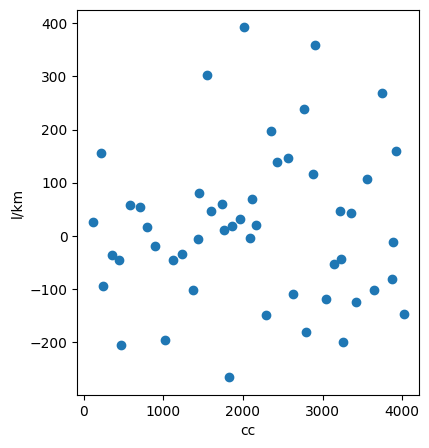

In [10]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.scatter(cc, l)
plt.xlabel('cc')
plt.ylabel('l/km')

Text(0, 0.5, 'l/km')

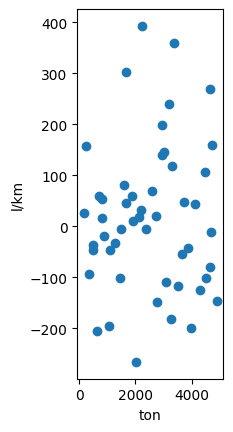

In [11]:
plt.subplot(1, 3, 2)
plt.scatter(ton, l)
plt.xlabel('ton')
plt.ylabel('l/km')

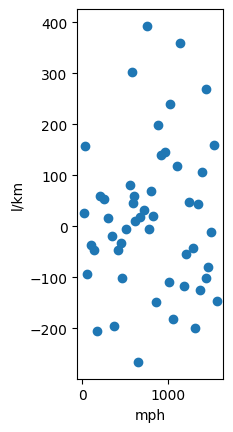

In [12]:
plt.subplot(1, 3, 3)
plt.scatter(mph, l)
plt.xlabel('mph')
plt.ylabel('l/km')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

minmax_scaler_x1 = StandardScaler()
minmax_scaler_x2 = StandardScaler()
minmax_scaler_x3 = StandardScaler()
minmax_scaler_y = StandardScaler()

cc = cc.reshape(-1, 1)
ton = ton.reshape(-1, 1)
mph = mph.reshape(-1, 1)
l = np.array(l).reshape(-1, 1)

X_scaled_minmax1 = minmax_scaler_x1.fit_transform(cc)
X_scaled_minmax2 = minmax_scaler_x2.fit_transform(ton)
X_scaled_minmax3 = minmax_scaler_x3.fit_transform(mph)
X_scaled_minmax = np.concatenate([X_scaled_minmax1, X_scaled_minmax2, X_scaled_minmax3], axis = 1)
y_scaled_minmax = minmax_scaler_y.fit_transform(l)

In [15]:
model = MR_model()
model.fit(cc, l)
pred = model.predict(cc)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
class Vectorization:
    def __init__(self, learning_rate=1e-20, n_iterations=30000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        np.random.seed(42)
        self.weights = np.random.unifrom(-0.1, 0.1, (3, ))
        self.bias = np.random.uniform(-0.1, 0.1)
    
    # MSE Loss 계산
    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def fit(self, x, y):
        n = len(x)  # 데이터 샘플 수
        
        for i in range(self.n_iterations):
            # 예측값 계싼
            y_pred = self.predict(x).reshape(-1, 1)
            
            # 현재 Loss 계산 및 저장
            current_loss = self.compute_loss(y, y_pred)
            
            # Gradient 계산
            error = y_pred - y
            dw = (2/n) * np.sum(x*error, axis = 0)
            db = (2/n) * np.sum(error)
            
            # 파라미터 업데이트
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            
            # 학습 과정 출력( 100회 반복시마다 )
            if(i+1) % 100 == 0:
                print(f'Iteration {i+1}/{self.n_iterations}, Loss: {current_loss:.6f}')
                
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias